In [348]:
import numpy as np
from skimage import transform
from skimage.data import astronaut
from PIL import Image
from torchvision.transforms.functional import _get_inverse_affine_matrix
import cv2 as cv
import matplotlib.pyplot as plt

from he.data.bounded_affine import get_corners
from he.data.maxrect import get_intersection, get_maximal_rectangle
from he.data.new_transforms import RandomAffine

In [349]:
def bounded_affine(image, angle, translation, scale, shear):
    image_np = np.asarray(image)
    height, width = image_np.shape[:2]
    
    center = (image.size[0] * 0.5 + 0.5, image.size[1] * 0.5 + 0.5)
    matrix = _get_inverse_affine_matrix(center, angle, translation, scale, shear, inverted=False)
    
    transformation_matrix = transform.AffineTransform(
        matrix=np.array(matrix + [0, 0, 1]).reshape(3, 3)
    )
    
    warped = transform.warp(image_np, transformation_matrix.inverse)
    
    original_corners = get_corners(image_np)
    transformed_corners = transformation_matrix(original_corners)
    
    coordinates1 = [(x, y) for x, y in transformed_corners]
    _, coordinates = get_intersection([coordinates1, ])
    (x4, y4), (x2, y2) = get_maximal_rectangle(list(coordinates))
    x1 = int(x4)
    y1 = int(y2)
    x3 = int(x2)
    y3 = int(y4)
    aa = (np.clip(x1, 0, width), np.clip(y1, 0, height))
    bb = (np.clip(x3, 0, width), np.clip(y3, 0, height))
    new = Image.fromarray((warped[bb[1]:aa[1], aa[0]:bb[0]] * 255.0).astype('uint8'))
    return new, (bb[1], aa[1], aa[0], bb[0])

In [350]:
image = Image.fromarray(astronaut())

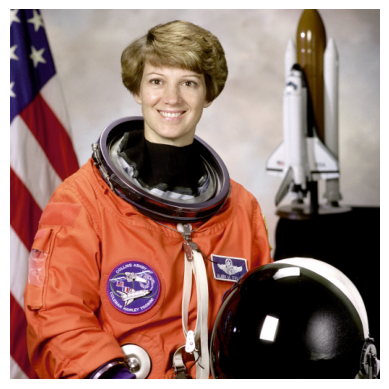

In [351]:
plt.imshow(image)
plt.axis('off')
plt.savefig('bounded-viz-original.png')

In [352]:
degrees = 45
translate = (0.25, 0.25)
scale = (0.7, 1.3)
shear = [-25, 25, -25, 25]

random_affine = RandomAffine(
    degrees=degrees,
    translate=translate,
    scale=scale,
    shear=shear
)

In [353]:
xt, params = random_affine(image)
angle, (tx, ty), scale, shear = params
print(params)

(-36.404057168859346, (25.0, -8.0), 0.9356248121686569, [1.3505091250392454, -8.741774110130152])


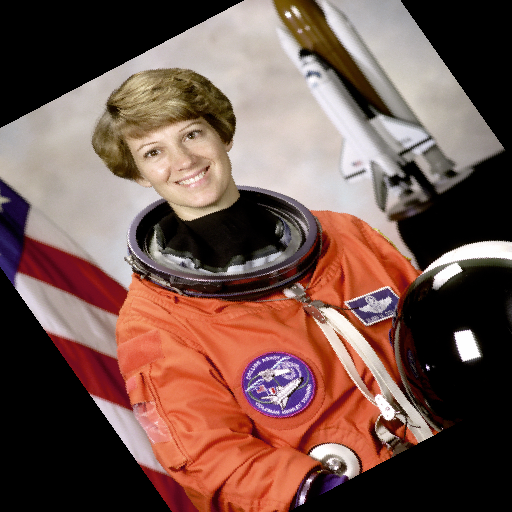

In [354]:
xt

In [355]:
new = bounded_affine(image, angle, [tx, ty], scale, shear)

In [356]:
new, params = new

In [357]:
params

(69, 427, 112, 447)

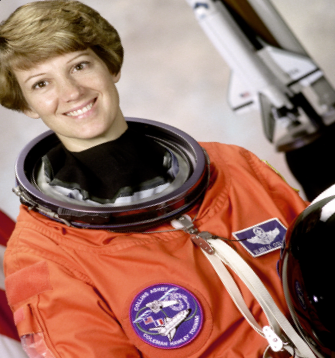

In [358]:
new

In [359]:
n = np.array(xt)
cv.rectangle(n, (params[2], params[0]), (params[3], params[1]), (255, 0, 0), 5)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

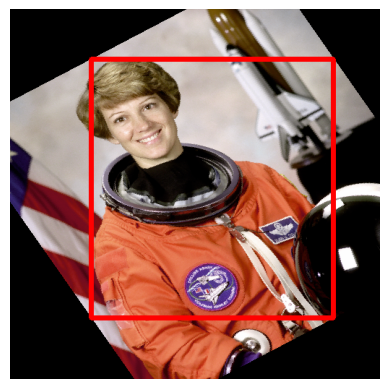

In [360]:
plt.imshow(n)
plt.axis('off')
plt.savefig('bounded-viz-inscribed.png')